In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import torch
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

In [2]:
dataset_zip = np.load(os.getcwd() + '/source/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', 
                      allow_pickle=True,
                      encoding='bytes'
                     )
type(dataset_zip)

numpy.lib.npyio.NpzFile

In [3]:
print(list(dataset_zip.keys()))

['metadata', 'imgs', 'latents_classes', 'latents_values']


In [4]:
imgs = dataset_zip['imgs']
print(type(imgs))

<class 'numpy.ndarray'>


In [5]:
imgs.shape

(737280, 64, 64)

In [6]:
latents_values = dataset_zip['latents_values']
latents_values.shape

(737280, 6)

In [7]:
latents_values[100]

array([1.        , 1.        , 0.5       , 0.        , 0.09677419,
       0.12903226])

In [8]:
latents_classes = dataset_zip['latents_classes']
latents_classes.shape

(737280, 6)

In [9]:
latents_classes[1500]

array([ 0,  0,  0,  1, 14, 28])

In [10]:
metadata = dataset_zip['metadata'][()]

In [11]:
type(metadata)

dict

In [12]:
list(metadata.keys())

[b'date',
 b'description',
 b'version',
 b'latents_names',
 b'latents_possible_values',
 b'latents_sizes',
 b'author',
 b'title']

In [13]:
latents_sizes = metadata[b'latents_sizes']
latents_sizes

array([ 1,  3,  6, 40, 32, 32])

In [14]:
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:], np.array([1,])))
latents_bases

array([737280, 245760,  40960,   1024,     32,      1])

In [15]:
latents_sizes[::-1].cumprod()

array([    32,   1024,  40960, 245760, 737280, 737280])

In [16]:
latents_sizes[::-1].cumprod()[::-1]

array([737280, 737280, 245760,  40960,   1024,     32])

In [19]:
print(f"Max: {np.max(imgs)}")
print(f"min: {np.min(imgs)}")
print(f"Avg: {np.mean(imgs)}")

Max: 1
min: 0
Avg: 0.042494423521889584


In [31]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(40, 40))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

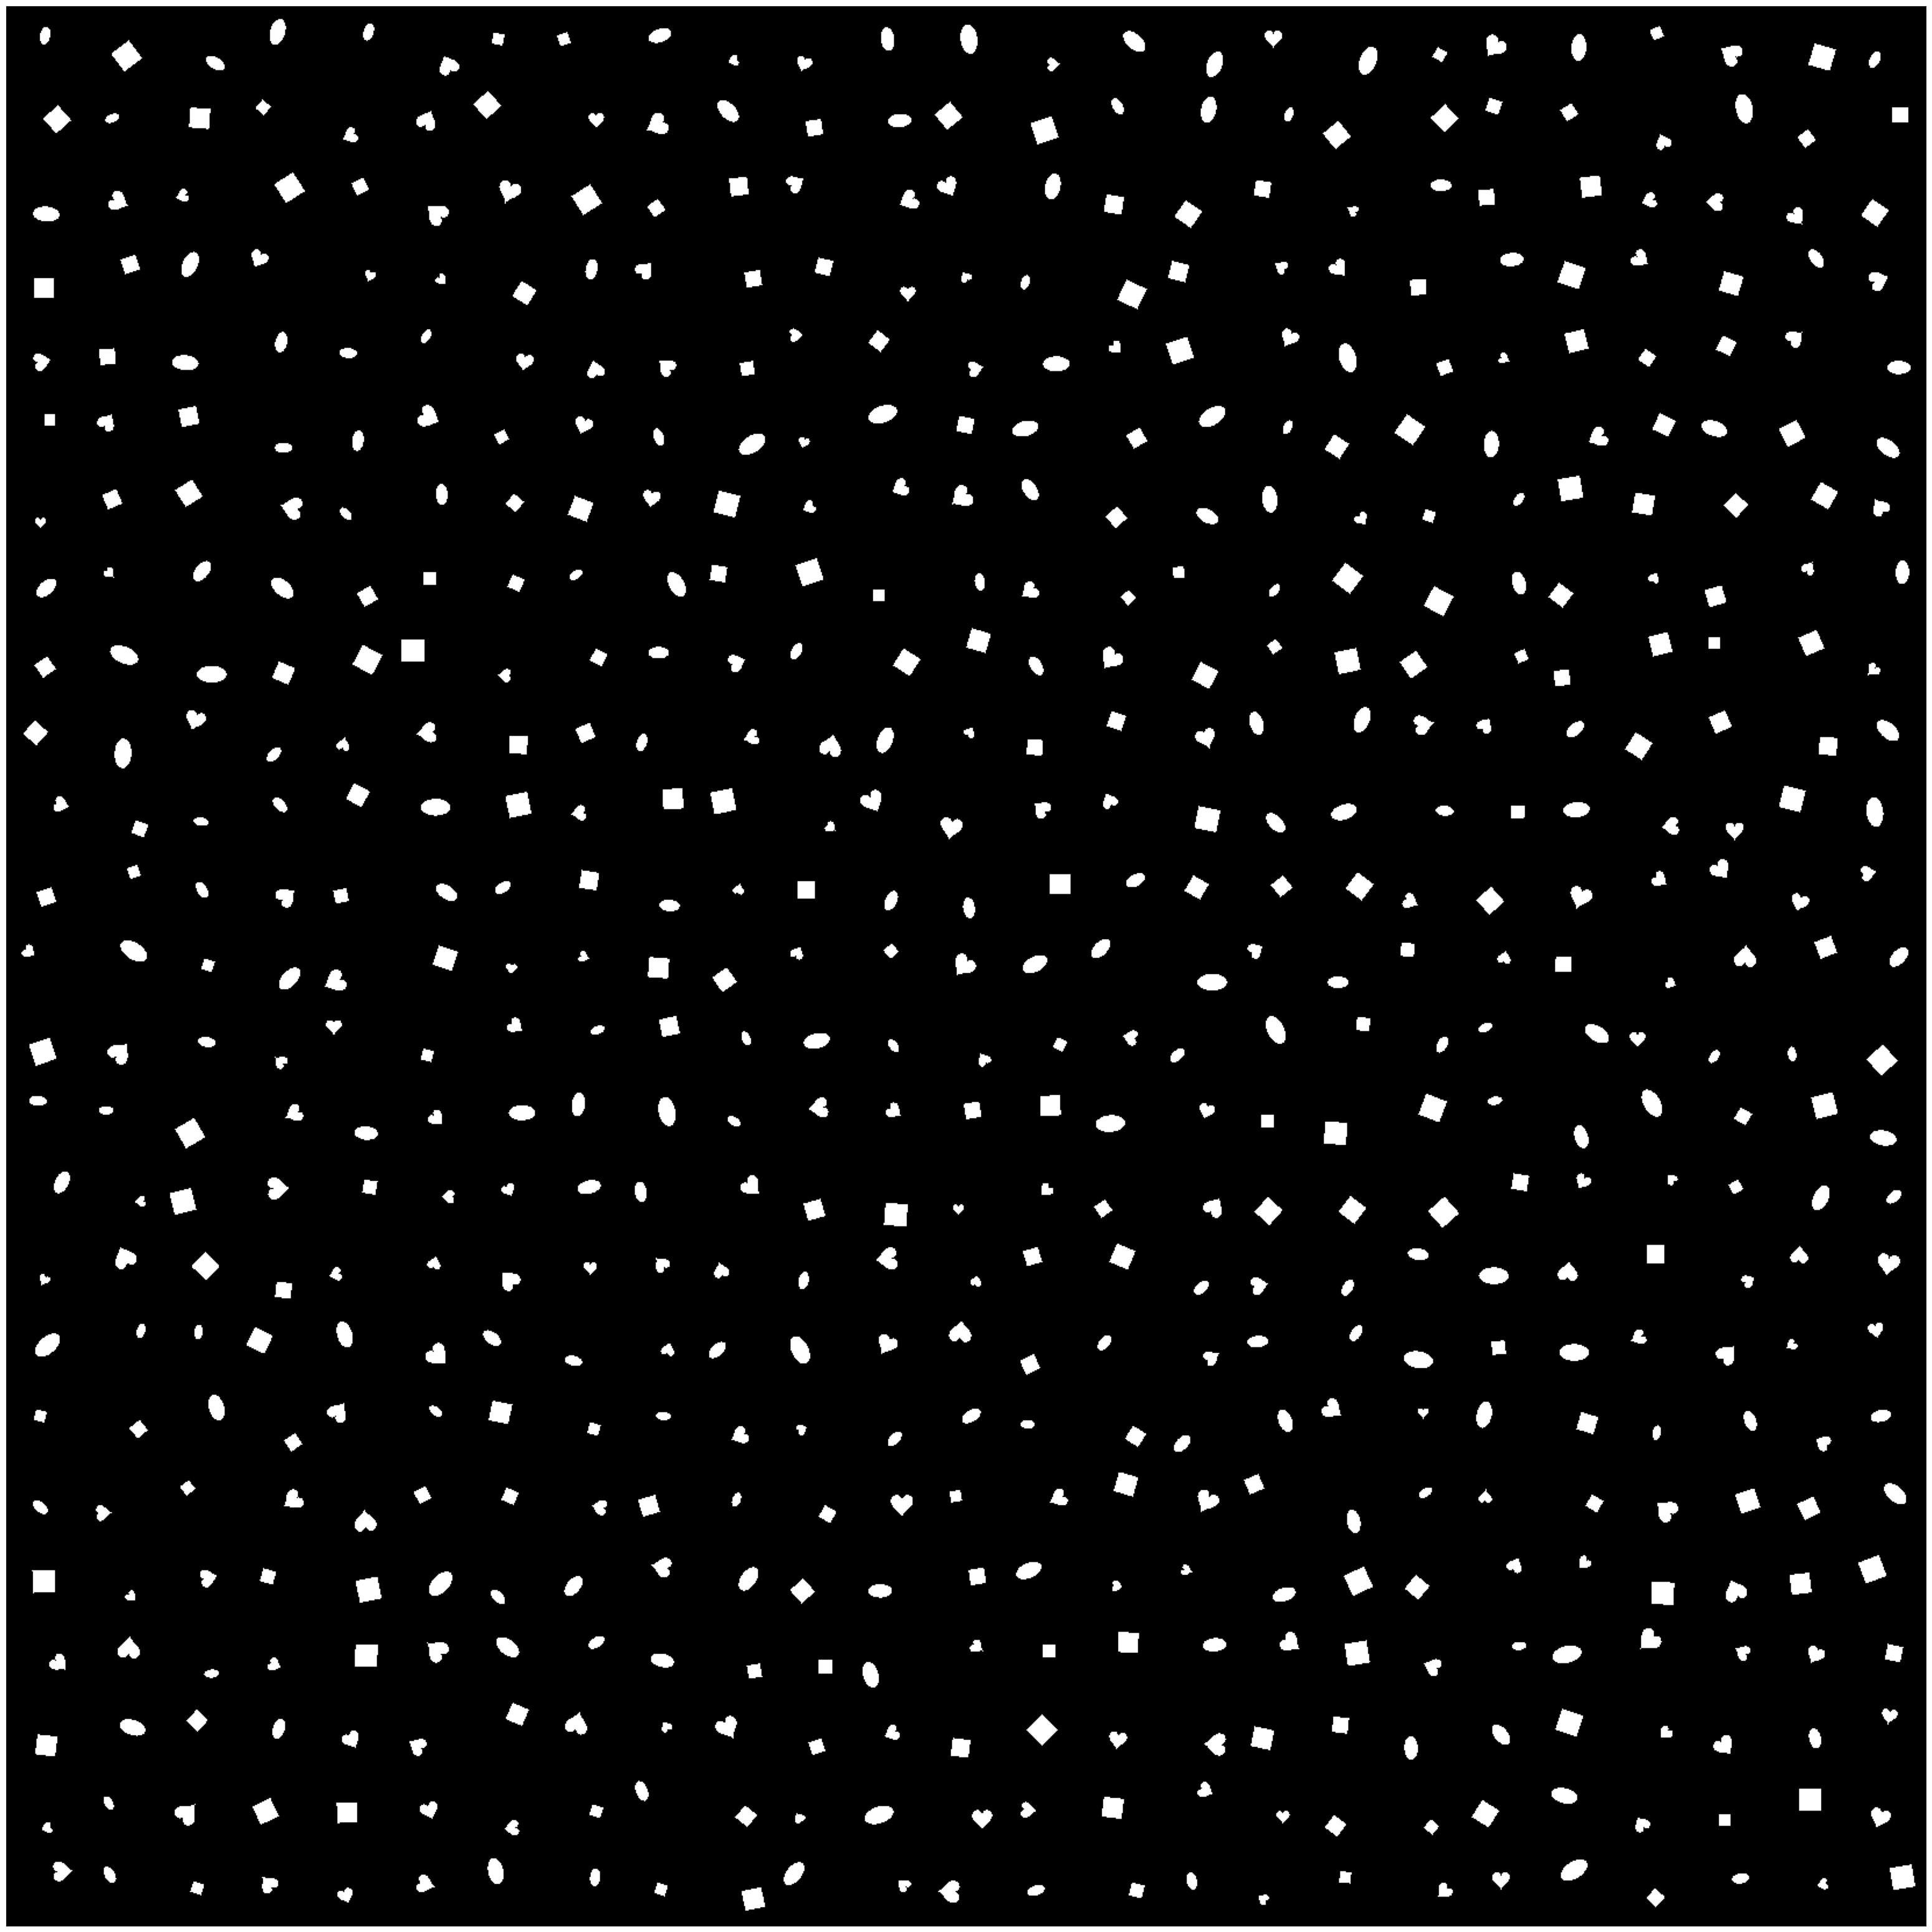

In [32]:
indices = np.random.choice(737280, size = 625)

sample_imgs = imgs[indices]

torch_sample_imgs = torch.from_numpy(sample_imgs).unsqueeze(1)

grid = make_grid(torch_sample_imgs*255, nrow=25)

show(grid)